<a href="https://colab.research.google.com/github/Esaipriya/AISECT-ML/blob/main/IMG_clf_CNN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import io
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os

In [3]:
# Specify the path to your zip file
zip_file_path = '/content/archive (13).zip'

# Directory to extract the contents
extracted_dir = 'extracted_files'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extracted_dir)

print(f"Zip file '{zip_file_path}' extracted to '{extracted_dir}'")

Zip file '/content/archive (13).zip' extracted to 'extracted_files'


In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% train, 20% validation

In [10]:
train_data = datagen.flow_from_directory(
    extracted_dir, # Use the extracted directory instead of the zip file
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset ='training'
)

Found 800 images belonging to 2 classes.


In [13]:
val_data = datagen.flow_from_directory(
    extracted_dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    subset ='validation'
)

Found 200 images belonging to 2 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - accuracy: 0.4838 - loss: 0.7153 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.5109 - loss: 0.6921 - val_accuracy: 0.5300 - val_loss: 0.6918
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 318ms/step - accuracy: 0.5333 - loss: 0.6918 - val_accuracy: 0.5800 - val_loss: 0.6891
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.5701 - loss: 0.6869 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 320ms/step - accuracy: 0.5236 - loss: 0.6907 - val_accuracy: 0.5050 - val_loss: 0.6958
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 266ms/step - accuracy: 0.5454 - loss: 0.6783 - val_accuracy: 0.5750 - val_loss: 0.6772
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.6241 - loss: 0.6494 - val_accuracy: 0.5650 - val_loss: 0.6729
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.6755 - loss: 0.6394 - val_accuracy: 

In [24]:
loss, acc = model.evaluate(val_data, verbose=2)
print(f"Validation Accuracy: {acc:.4f}")

7/7 - 1s - 102ms/step - accuracy: 0.5950 - loss: 0.7196
Validation Accuracy: 0.5950


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your single image
single_image_path = '/content/dog' # Replace with the path to your image

# Load and preprocess the image
img = image.load_img(single_image_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
img_array /= 255.0  # Rescale the image like the training data

# Make a prediction
predictions = model.predict(img_array)

# Get the class labels (assuming they are in alphabetical order based on directory names)
class_labels = list(train_data.class_indices.keys())

# Get the predicted class and probability
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]
prediction_probability = predictions[0][predicted_class_index]

print(f"Predicted class: {predicted_class}")
print(f"Prediction probability: {prediction_probability:.4f}")

# Add an if-else statement based on the predicted class
if predicted_class == 'dogs_set': # Replace 'dogs_set' with your actual class label for dogs
    print("The image is likely a dog.")
elif predicted_class == 'cats_set': # Replace 'cats_set' with your actual class label for cats
    print("The image is likely a cat.")
else:
    print("Could not confidently classify the image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted class: dogs_set
Prediction probability: 0.8865
The image is likely a dog.


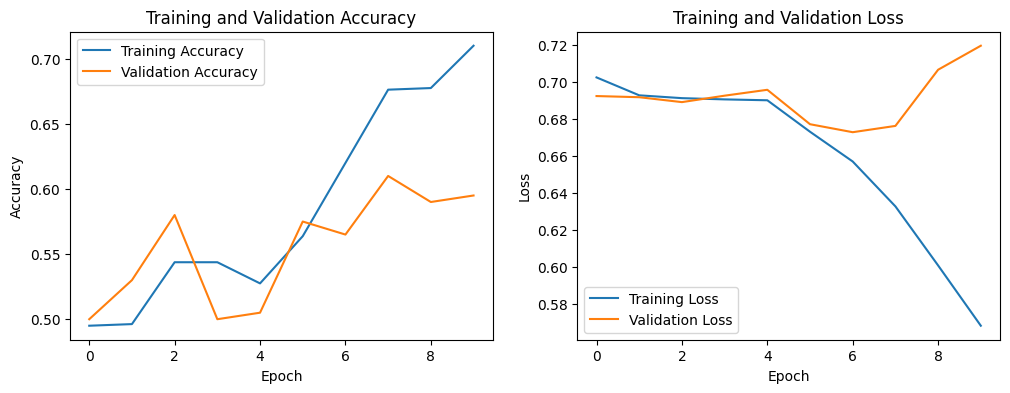

In [26]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss (optional but good practice)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


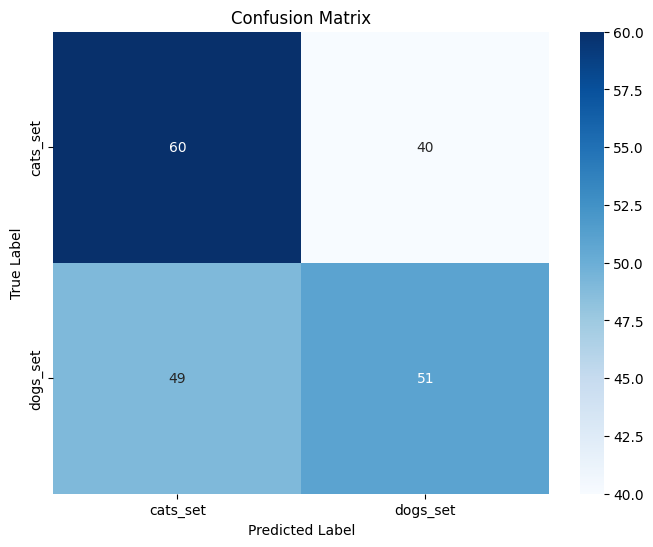

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the true labels for the validation data
val_labels = val_data.classes

# Reset the validation data generator to ensure predictions are in the same order as labels
val_data.reset()

# Get the model's predictions for the validation data
predictions = model.predict(val_data)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(val_labels, predicted_classes)

# Get the class labels
class_labels = list(val_data.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()